In [1]:
import os

from google.colab import drive

INIT=True
PATH="/content"

if INIT:
  drive.mount('/content/drive')
  ! pip install kaggle

  !mkdir ~/.kaggle


  ! cp kaggle.json ~/.kaggle/
  ! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:

!pip install --upgrade pyarrow pandas



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 79.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you hav

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import polars as pl
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

# Additional check for GPU device name
gpu_device = tf.test.gpu_device_name()
if gpu_device:
    print(f"TensorFlow is using GPU: {gpu_device}")
else:
    print("TensorFlow is not using a GPU")

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow is using GPU: /device:GPU:0


In [6]:
! kaggle datasets download -d mpp1998/leap-percentiles-of-full-df
! unzip -o  leap-percentiles-of-full-df.zip -d    leap-percentiles-of-full-df

Dataset URL: https://www.kaggle.com/datasets/mpp1998/leap-percentiles-of-full-df
License(s): unknown
  0% 0.00/2.42M [00:00<?, ?B/s]
100% 2.42M/2.42M [00:00<00:00, 180MB/s]
Archive:  leap-percentiles-of-full-df.zip
  inflating: leap-percentiles-of-full-df/limits_train_percentiles.csv  
  inflating: leap-percentiles-of-full-df/myutils/constants.py  
  inflating: leap-percentiles-of-full-df/myutils/kaggle_metric_utilities.py  
  inflating: leap-percentiles-of-full-df/myutils/metric.py  
  inflating: leap-percentiles-of-full-df/percentiles.pkl  


In [7]:
! kaggle datasets download -d mpp1998/leapdata-minmax-mean-scaler
! unzip -o  leapdata-minmax-mean-scaler.zip -d  leap-nn-data-input

Dataset URL: https://www.kaggle.com/datasets/mpp1998/leapdata-minmax-mean-scaler
License(s): unknown
100% 11.4G/11.4G [01:33<00:00, 152MB/s]
100% 11.4G/11.4G [01:33<00:00, 131MB/s]
Archive:  leapdata-minmax-mean-scaler.zip
  inflating: leap-nn-data-input/df_0_features_1.parquet  
  inflating: leap-nn-data-input/df_0_features_array.npy  
  inflating: leap-nn-data-input/df_0_targets.parquet  
  inflating: leap-nn-data-input/df_10_features_1.parquet  
  inflating: leap-nn-data-input/df_10_features_array.npy  
  inflating: leap-nn-data-input/df_10_targets.parquet  
  inflating: leap-nn-data-input/df_11_features_1.parquet  
  inflating: leap-nn-data-input/df_11_features_array.npy  
  inflating: leap-nn-data-input/df_11_targets.parquet  
  inflating: leap-nn-data-input/df_12_features_1.parquet  
  inflating: leap-nn-data-input/df_12_features_array.npy  
  inflating: leap-nn-data-input/df_12_targets.parquet  
  inflating: leap-nn-data-input/df_13_features_1.parquet  
  inflating: leap-nn-data

In [8]:
df_limits = pd.read_csv("leap-percentiles-of-full-df/limits_train_percentiles.csv",index_col=0)
df_limits.sort_values(by="max") .head(50)

,max,min,q99,q01,std,mean
column,,,,,,
ptend_q0002_12,-2.147357e-53,-2.692638e-38,-1.062446e-48,-5.291556e-39,7.798521e-41,-2.113759e-41
ptend_q0002_17,0.000000e+00,-1.394760e-39,0.000000e+00,-5.596019e-56,1.369964e-43,-3.815392e-46
ptend_q0002_8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [9]:
import tensorflow as tf
import pandas as pd
import glob



In [10]:
indices=[0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
indices=[0,1,3,4,9,10,11,13,14,15,16,17,19,20,21,22,26,27,28,29]
x1=[]
for i in indices:
    with open(f"leap-nn-data-input/df_{i}_features_array.npy","rb") as file:
        x1 .append( np.load(file))
x1=np.concatenate(x1,axis=0)
x2=pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_features_1.parquet") for i in indices],axis=0)
y =  pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_targets.parquet")for i in indices],axis=0)



In [11]:
x1_val=[]
indices_val=[8]
for i in indices_val:
    with open(f"leap-nn-data-input/df_{i}_features_array.npy","rb") as file:
        x1_val .append( np.load(file))
x1_val=np.concatenate(x1_val,axis=0)
x2_val=pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_features_1.parquet") for i in indices_val],axis=0)
y_val =  pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_targets.parquet") for i in indices_val ],axis=0)

x1.shape,x2.shape, y.shape

((4983909, 60, 9), (4983909, 16), (4983909, 368))

In [12]:
dim3_targets =y.shape

In [13]:
x1_test=[]
indices_test=[8]
for i in indices_test:
    with open(f"leap-nn-data-input/df_{i}_features_array.npy","rb") as file:
        x1_test.append( np.load(file))
x1_test=np.concatenate(x1_test,axis=0)
x2_test=pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_features_1.parquet") for i in indices_test],axis=0)
y_test =  pd.concat( [pd.read_parquet(f"leap-nn-data-input/df_{i}_targets.parquet") for i in indices_test ],axis=0)

x1_test.shape,x2_test.shape, y_test.shape

((246248, 60, 9), (246248, 16), (246248, 368))

In [14]:
y = y.iloc[:,:-8]


In [15]:
y_test = y_test.iloc[:,:-8]
y_val = y_val.iloc[:,:-8]
y.shape, y_test.shape, y_val.shape

((4983909, 360), (246248, 360), (246248, 360))

In [16]:
CFG = {
    'time_mixing_dim':60,
    "feature_mixing_dim":32,
    'encoder_first_dropout':0.05,
    'encoder_second_dropout':0.05,
    'model_num_encoder_layers':1,
    'model_num_lstm_layers':1,
    "lstm_dim": 64,
    "do_time_mixing" : False


}
BATCH_SIZE =1024

In [17]:
import tensorflow as tf
import numpy as np

In [18]:
HACER_PRUEBAS = False
if HACER_PRUEBAS:
    x1 = tf.keras.layers.Dense(8)(np.arange(10).reshape(5, 2))
    x2 =  tf.tile(tf.keras.layers.Dense(8)(np.arange(18, 20).reshape(1, 2)),(5,1))
    tf.reshape(x2,(-1,1))
    x1.shape,x2.shape
    concatted = tf.keras.layers.Concatenate()([x1, x2])
    concatted.shape


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2


import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2


def Unet(input_shape=(None,1),input_shape2=(16,)):
    layer_n = 64
    kernel_size = 7
    depth = 2

    input_layer = Input(input_shape)
    input_layer2 = Input(input_shape2)

    def build_cnn(activation='relu'):
      return keras.Sequential([
          keras.layers.Conv1D(1024, 3, padding='same', activation=activation),
          keras.layers.BatchNormalization(),
          keras.layers.Conv1D(512, 5, padding='same', activation=activation),
          keras.layers.BatchNormalization(),
          keras.layers.Conv1D(256, 7, padding='same', activation=activation),
          keras.layers.BatchNormalization(),
      ])
    x = Concatenate() ([input_layer,tf.tile(tf.reshape(input_layer2,(BATCH_SIZE,1,16)),(1, 60,1))])






    e = e0 = keras.layers.Conv1D(256, 1, padding='same')(x)
    e = build_cnn()(e)
    dropout= tf.keras.layers.Dropout(0.5)
    e = dropout(e)
    # add global average to allow some comunication between all levels even in a small CNN
    e = e0 + e + keras.layers.GlobalAveragePooling1D(keepdims=True)(e)
    e = keras.layers.BatchNormalization()(e)
    e = e + build_cnn()(e)


    p_all = keras.layers.Conv1D(6, 1, padding='same')(e)

    out= tf.reshape(p_all[:,22:,:],(-1,360-22*6))


    model = Model((input_layer,input_layer2), out)

    return model

In [20]:
import tensorflow as tf
from sklearn.metrics import r2_score
import keras
from tensorflow.keras.metrics import R2Score
@keras.saving.register_keras_serializable()
def r2_keras(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot)
@keras.saving.register_keras_serializable()
def r2_mult_keras(y_true, y_pred):

    SS_res =  tf.reduce_sum(tf.math.square(y_true - y_pred),axis=0)
    SS_tot = tf.reduce_sum(tf.math.square(y_true - tf.reduce_mean(y_true, axis=0 )),axis=0)
    vals = 1 - SS_res/(SS_tot+0.00000000001)
    vals_clipped = tf.where(vals < 0, tf.zeros_like(vals), vals)


    return     tf.reduce_mean(vals_clipped )

In [21]:
y_train= y.values.reshape(-1,6,60).transpose(0,2,1)[:,22:,:].reshape((-1,360-22*6))
y_train.shape
x2_train =x2.values
x1_train=x1

In [22]:
y_val= y_val.values.reshape(-1,6,60).transpose(0,2,1)[:,22:,:].reshape((-1,360-22*6))
y_val.shape
x2_val =x2_val.values
x1_val=x1_val

In [23]:
y_val.shape,y_train.shape

((246248, 228), (4983909, 228))

In [24]:

x2_test=x2_test.values
y_test= y_test.values.reshape(-1,6,60).transpose(0,2,1)[:,22:,:].reshape((-1,360-22*6))


In [25]:
y_train.shape,x2_train.shape,x1_train.shape

((4983909, 228), (4983909, 16), (4983909, 60, 9))

In [26]:
y_val.shape,x2_val.shape,x1_val.shape

((246248, 228), (246248, 16), (246248, 60, 9))

In [27]:
size= x1_train.shape[0]//BATCH_SIZE* BATCH_SIZE
val_size= x1_val.shape[0]//BATCH_SIZE* BATCH_SIZE

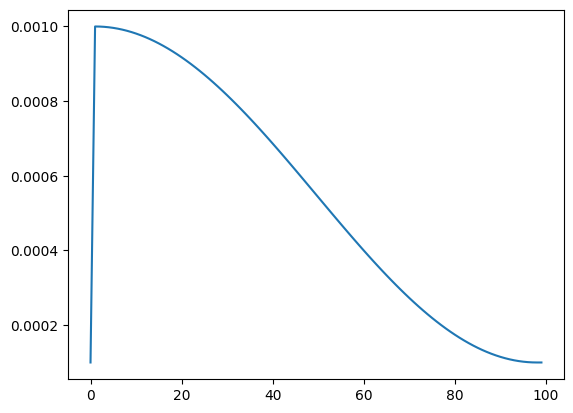

In [28]:
epochs = 100  # 25  # 15  # 12
learning_rate = 1e-3
import matplotlib.pyplot as plt

epochs_warmup = 1
epochs_ending = 2
steps_per_epoch = int(size / BATCH_SIZE)

lr_scheduler = keras.optimizers.schedules.CosineDecay(
    1e-4,
    (epochs - epochs_warmup - epochs_ending) * steps_per_epoch,
    warmup_target=learning_rate,
    warmup_steps=steps_per_epoch * epochs_warmup,
    alpha=0.1
)

plt.plot([lr_scheduler(it) for it in range(0, epochs * steps_per_epoch, steps_per_epoch)])

In [29]:

early_stopping = EarlyStopping(
monitor='r2_mult_keras',
patience=15,
verbose=1,
restore_best_weights=True,
mode='max')

model=Unet((None,9),(16,))
# Compilar el modelo con pérdida MSE
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler), loss='mean_squared_error',metrics=[  r2_mult_keras])



In [30]:

import tensorflow as tf
from tensorflow.keras.callbacks import Callback
class SaveBestModelEveryNEpochs(Callback):
    def __init__(self, save_freq, save_path):
        super(SaveBestModelEveryNEpochs, self).__init__()
        self.save_freq = save_freq
        self.save_path =  save_path
        self.best_weights = None
        self.best_epoch = 0
        self.best_val_loss = -1111

    def on_epoch_end(self, epoch, logs=None):


        if (epoch + 1) % self.save_freq == 0:
            print(f"Epoch {epoch+1}: saving model to {self.save_path}")
            self.model.save_weights(self.save_path)

    def on_train_end(self, logs=None):
        if self.best_weights is not None:
           pss

In [31]:
save_best_model_callback = SaveBestModelEveryNEpochs(save_freq=5, save_path=f"drive/MyDrive/leap/keras_models/model_all_data_unet_path.h5")

In [32]:
def create_dataset(x1, x2, y, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(((x1,x2),y.astype(np.float32)))
    dataset = dataset.shuffle(100_000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Assuming x1_train, x2_train, y_train, x1_val, x2_val, y_val are your numpy arrays

train_dataset = create_dataset(x1_train[:size,:,:], x2_train[:size], y_train[:size,:], BATCH_SIZE)
val_dataset = create_dataset(x1_val[:val_size,:,:], x2_val[:val_size], y_val[:val_size,:], BATCH_SIZE)

In [33]:
x1_train.shape,y_train[:size,:].shape

((4983909, 60, 9), (4983808, 228))

In [34]:
model.fit(train_dataset, epochs=300,validation_data=(val_dataset ),batch_size=BATCH_SIZE, callbacks=[early_stopping,save_best_model_callback])

Epoch 1/300
   6/4867 [..............................] - ETA: 1:10:26 - loss: 3.4506 - r2_mult_keras: 0.0000e+00

 210/4867 [>.............................] - ETA: 1:09:54 - loss: 0.3248 - r2_mult_keras: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
model.save_weights(f"drive/MyDrive/leap/keras_models/model_all_data_unet6.h5")

In [ ]:
model_loaded=Unet((None,9),(16,))

In [ ]:
model_loaded.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error',metrics=[  R2Score(
class_aggregation='uniform_average',
num_regressors=0,
name='r2_score',
dtype=None
),  r2_mult_keras])

In [ ]:
model_loaded([x1_train[:BATCH_SIZE,:60,:],x2_train[:BATCH_SIZE]])

In [ ]:
model_loaded.load_weights(f"drive/MyDrive/leap/keras_models/model_all_data_unet6.h5")

In [ ]:
# Define padding for each dimension (for dimension 0, 1, and 2)
padding_3d = [[0, x1_test.shape[0]//BATCH_SIZE*BATCH_SIZE + BATCH_SIZE -  x1_test.shape[0]], [0, 0], [0, 0]]  # Add 1 zero at the beginning and 2 zeros at the end of dimension 0
padding_2d =  [[0, x1_test.shape[0]//BATCH_SIZE*BATCH_SIZE + BATCH_SIZE -  x1_test.shape[0]], [0, 0],]
# Add padding to the 3D tensor
x1_test_padded = tf.pad(x1_test, padding_3d, "CONSTANT")
x2_test_padded = tf.pad(x2_test, padding_2d, "CONSTANT")

In [ ]:
x1_test_padded.shape,x2_test_padded.shape

In [ ]:
tf.__version__

In [ ]:
import ctypes
import gc
import random
def clear_memory():
    tf.keras.backend.clear_session()  # Clear the Keras session
    tf.compat.v1.reset_default_graph()  # For TensorFlow 1.x compatibility
    gc.collect()  # Garbage collection
    print("GPU memory cleared.")

In [ ]:
clear_memory()

In [ ]:
y_pred = model_loaded.predict([x1_test_padded[:,:,:],x2_test_padded],batch_size=BATCH_SIZE)

In [ ]:
y_pred= y_pred[:y_test.shape[0]]

In [ ]:
y_test.shape

In [ ]:
scores= []
for i in range(y_test.shape[1]):
  score_=r2_score(y_test[:,i],y_pred[:,i])
  print(score_)
  scores.append(score_)

In [ ]:
scores =np.array(scores).reshape(38,6)

In [ ]:
scores.mean()

In [ ]:
import sys
sys.version